In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
# Download required NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("/Users/henryasiamah/Desktop/work/senti_data.csv")
df.head()

,Date,Headline,Source,Country/Organization,Extracted_Content
0,2024-06-07,www.bbc.com,BBC,UK,The UK government wants to send some asylum se...
1,2024-06-07,www.bbc.com,BBC,UK,The International Organization for Migration e...
2,2024-06-07,www.bbc.com,BBC,UK,"On 6 June, around 80 migrants, including at le..."
3,2024-06-07,www.bbc.com,BBC,UK,"However, numbers rose again throughout the 201..."
4,2024-06-07,www.bbc.com,BBC,UK,Where do UK asylum seekers come from?


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Tokenize, remove stopwords, and lemmatize the input text.
    """
    # Tokenize text
    tokens = word_tokenize(text.lower())  # Convert to lowercase for case-insensitive matching
    
    # Remove stopwords and non-alphabetic tokens
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return " ".join(filtered_tokens)


def perform_vader_analysis(text):
    """
    Perform VADER sentiment analysis on a given text.
    Returns a dictionary with compound, positive, negative, and neutral scores.
    """
    # Preprocess text before sentiment analysis
    preprocessed_text = preprocess_text(text)
    
    # Initialize VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # Get sentiment scores
    scores = sid.polarity_scores(preprocessed_text)
    
    # Determine sentiment category based on compound score
    if scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    # Add sentiment category to scores dictionary
    scores['sentiment_category'] = sentiment
    
    return scores

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
def analyze_dataframe(df, text_column):
    """
    Perform sentiment analysis on a DataFrame's text column.
    Returns DataFrame with sentiment scores added as new columns.
    """
    # Initialize lists to store scores
    compound_scores = []
    positive_scores = []
    negative_scores = []
    neutral_scores = []
    sentiment_categories = []
    
    # Analyze each text in the DataFrame
    for text in df[text_column]:
        if pd.isna(text):  # Handle NaN values
            scores = {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 0, 'sentiment_category': 'Neutral'}
        else:
            scores = perform_vader_analysis(str(text))
        
        compound_scores.append(scores['compound'])
        positive_scores.append(scores['pos'])
        negative_scores.append(scores['neg'])
        neutral_scores.append(scores['neu'])
        sentiment_categories.append(scores['sentiment_category'])
    
    # Add scores to DataFrame
    df['compound_score'] = compound_scores
    df['positive_score'] = positive_scores
    df['negative_score'] = negative_scores
    df['neutral_score'] = neutral_scores
    df['sentiment_category'] = sentiment_categories
    
    return df

In [5]:
def plot_sentiment_distribution(df):
    """
    Create visualizations for sentiment analysis results.
    """
    # Set up the plotting style
    plt.style.use('seaborn')
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Sentiment Category Distribution
    sentiment_counts = df['sentiment_category'].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax1)
    ax1.set_title('Distribution of Sentiment Categories')
    ax1.set_ylabel('Count')
    
    # Plot 2: Compound Score Distribution
    sns.histplot(data=df, x='compound_score', bins=30, ax=ax2)
    ax2.set_title('Distribution of Compound Scores')
    ax2.set_xlabel('Compound Score')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    return fig

In [6]:
# usage
if __name__ == "__main__":
    # Load DataFrame
    #df = pd.read_csv('your_data.csv')
    
    # Perform analysis on specific column
    df = analyze_dataframe(df, 'Extracted_Content')
    
    # Create and save visualization
    fig = plot_sentiment_distribution(df)
    plt.savefig('sentiment_analysis_results222_new.png')
    plt.close()
    
    # Generate summary statistics
    print("\nSummary Statistics:")
    print(f"Average Compound Score: {df['compound_score'].mean():.3f}")
    print("\nSentiment Distribution:")
    print(df['sentiment_category'].value_counts())
    
    # Save results
    df.to_csv('sentiment_analysis_results_with preprocessing.csv', index=False)

/var/folders/p8/733n06nx7bd3_rxwf0gydk_w0000gn/T/ipykernel_1082/1563586324.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/Users/henryasiamah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Summary Statistics:
Average Compound Score: -0.045

Sentiment Distribution:
sentiment_category
Negative    17610
Positive    15952
Neutral      9218
Name: count, dtype: int64


In [7]:
df.head()

,Date,Headline,Source,Country/Organization,Extracted_Content,compound_score,positive_score,negative_score,neutral_score,sentiment_category
0,2024-06-07,www.bbc.com,BBC,UK,The UK government wants to send some asylum se...,0.0772,0.091,0.000,0.909,Positive
1,2024-06-07,www.bbc.com,BBC,UK,The International Organization for Migration e...,-0.5574,0.000,0.310,0.690,Negative
2,2024-06-07,www.bbc.com,BBC,UK,"On 6 June, around 80 migrants, including at le...",0.0258,0.193,0.186,0.621,Neutral
3,2024-06-07,www.bbc.com,BBC,UK,"However, numbers rose again throughout the 201...",0.0772,0.178,0.000,0.822,Positive
4,2024-06-07,www.bbc.com,BBC,UK,Where do UK asylum seekers come from?,0.0000,0.000,0.000,1.000,Neutral


In [8]:
# Count the number of each sentiment
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts

sentiment_category
Negative    17610
Positive    15952
Neutral      9218
Name: count, dtype: int64

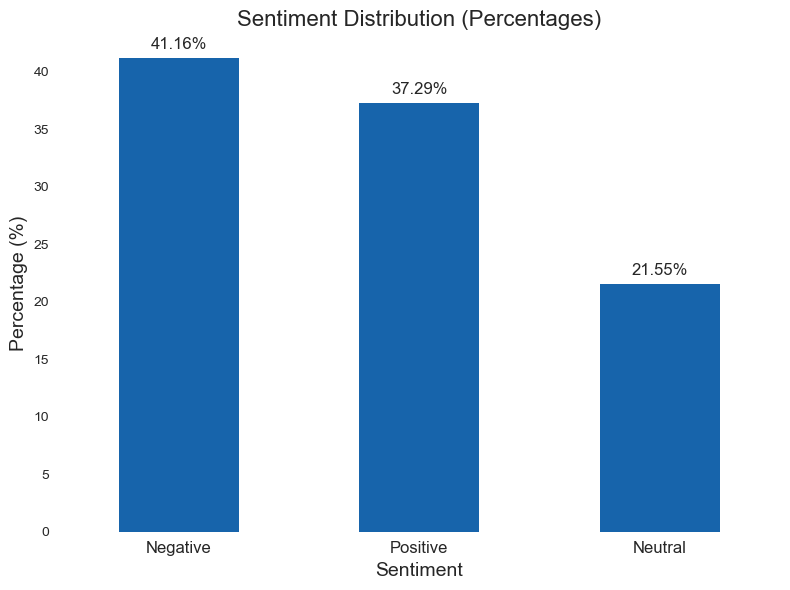

In [9]:
import matplotlib.pyplot as plt
from matplotlib.cm import Blues

# Calculate the percentage for each sentiment category
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plot a bar chart for sentiment percentages with data labels
plt.figure(figsize=(8, 6), facecolor='white')  # Remove figure background color

# Generate the bar chart using a light blue from the Blues colormap
ax = sentiment_percentages.plot(kind='bar', color=Blues(0.8))  # Light blue from colormap

# Remove the axes background color
ax.set_facecolor('white')  # Remove axes background color

# Add data labels (percentages) on top of the bars
for i, percentage in enumerate(sentiment_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title("Sentiment Distribution (Percentages)", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save the plot before showing
plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/percentage_sentiment_count77.png", transparent=True)

# Show the plot
plt.show()
plt.close()

In [10]:
# # Calculate the percentage for each sentiment category
# sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# # Plot a bar chart for sentiment percentages with data labels
# plt.figure(figsize=(8, 6))

# # Generate the bar chart using the percentages
# ax = sentiment_percentages.plot(kind='bar', color='blue')  # Set all bars to blue

# # Add data labels (percentages) on top of the bars
# for i, percentage in enumerate(sentiment_percentages):
#     ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# # Customize the chart
# plt.title("Sentiment Distribution (Percentages)", fontsize=16)
# plt.xlabel("Sentiment", fontsize=14)
# plt.ylabel("Percentage (%)", fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.tight_layout()

# # Save the plot before showing
# #plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/percentage_sentiment_count44.png")

# # Show the plot
# plt.show()
# plt.close()

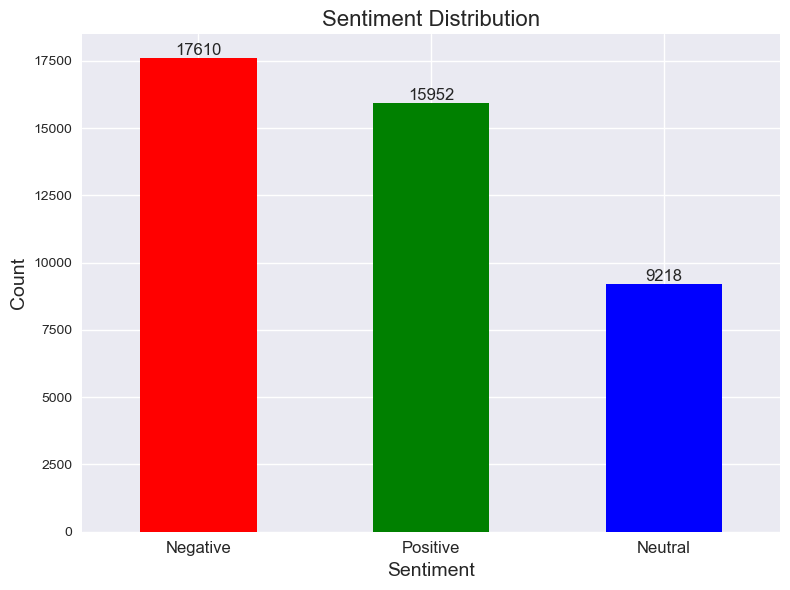

In [11]:
# Plot a bar chart for sentiment counts with data labels
plt.figure(figsize=(8, 6))

# Generate the bar chart
ax = sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])

# Add data labels
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/sentiment_count_22.png")

# Show the plot
plt.show()
plt.close()

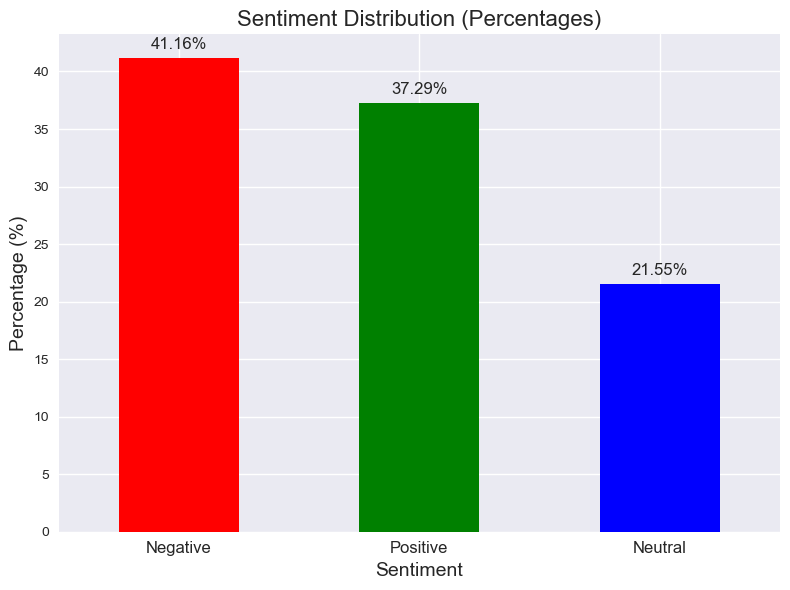

In [12]:
# Calculate the percentage for each sentiment category
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plot a bar chart for sentiment percentages with data labels
plt.figure(figsize=(8, 6))

# Generate the bar chart using the percentages
ax = sentiment_percentages.plot(kind='bar', color=['red', 'green', 'blue'])

# Add data labels (percentages) on top of the bars
for i, percentage in enumerate(sentiment_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title("Sentiment Distribution (Percentages)", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/percentage_sentiment_count22.png")

# Show the plot
plt.show()
plt.close()

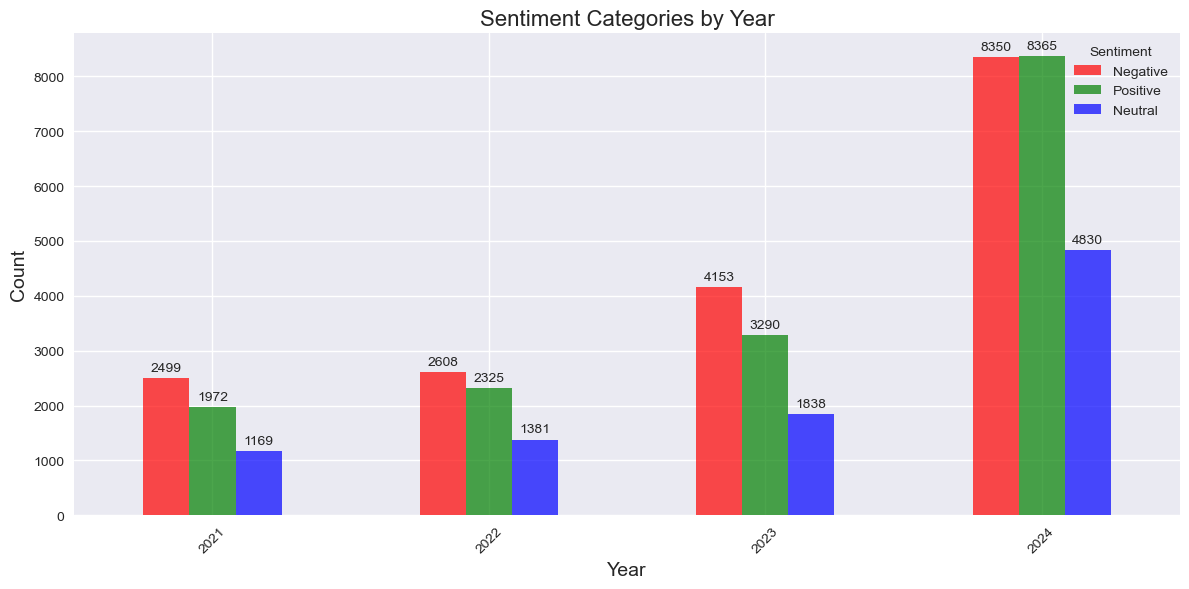

In [13]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by Year and sentiment category, and get the count of each category
sentiment_by_year = df.groupby(['Year', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (negative, positive, neutral)
sentiment_by_year = sentiment_by_year[['Negative', 'Positive', 'Neutral']]

# Plot sentiment categories by year (Line Chart or Bar Chart)
ax = sentiment_by_year.plot(
    kind='bar',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],  # Red for negative, Green for positive, Blue for neutral
    alpha=0.7
)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Customize the plot
plt.title('Sentiment Categories by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/sentiment_year22.png")

# Show the plot
plt.show()
plt.close()

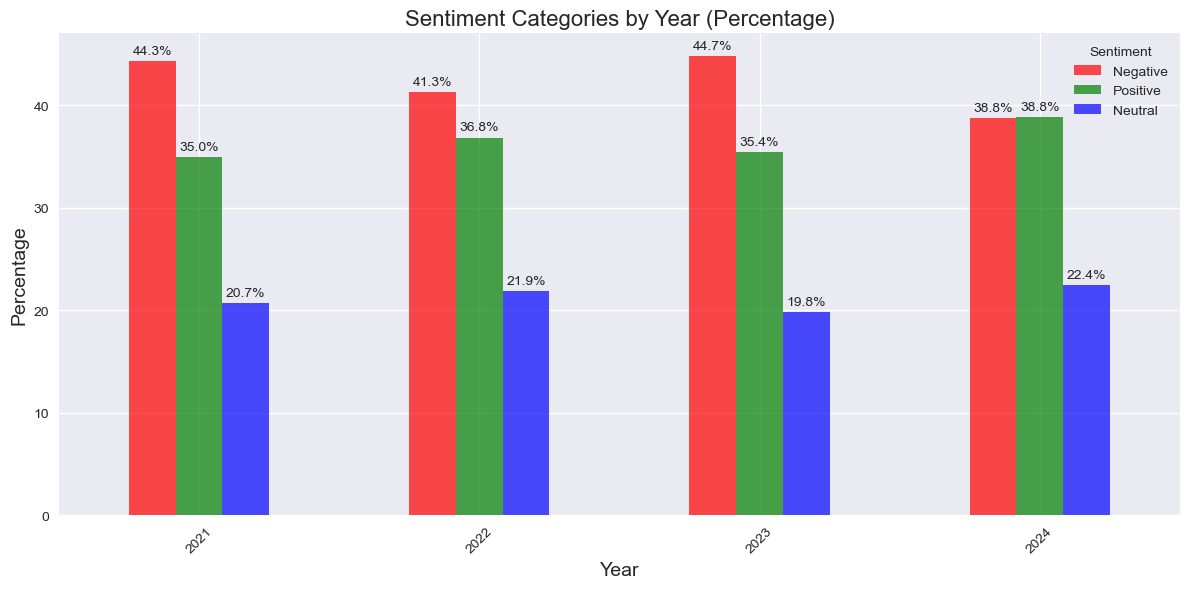

In [14]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by Year and sentiment category, and get the count of each category
sentiment_by_year = df.groupby(['Year', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (negative, positive, neutral)
sentiment_by_year = sentiment_by_year[['Negative', 'Positive', 'Neutral']]

# Calculate percentages by dividing each value by the sum of the values for the year
sentiment_percentage_by_year = sentiment_by_year.div(sentiment_by_year.sum(axis=1), axis=0) * 100

# Plot sentiment categories by year (Grouped Bar Chart)
ax = sentiment_percentage_by_year.plot(
    kind='bar',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7
)

# Add data labels to the bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

# Customize the plot
plt.title('Sentiment Categories by Year (Percentage)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/sentiment_year_percentage.png")

# Show the plot
plt.show()
plt.close()

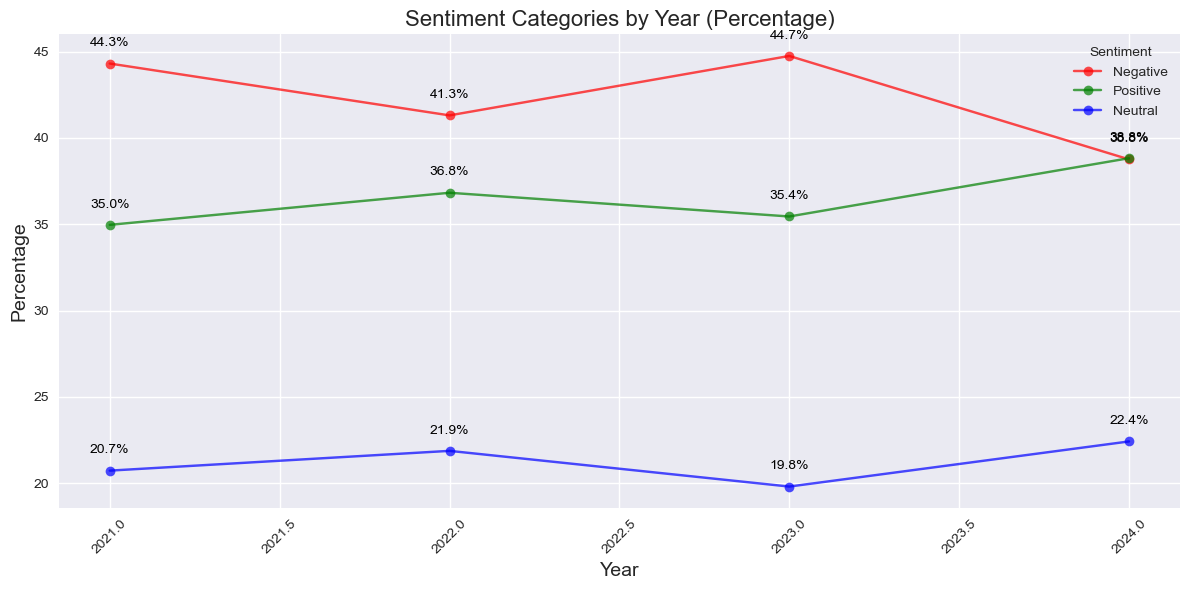

In [15]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by Year and sentiment category, and get the count of each category
sentiment_by_year = df.groupby(['Year', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (negative, positive, neutral)
sentiment_by_year = sentiment_by_year[['Negative', 'Positive', 'Neutral']]

# Calculate percentages by dividing each value by the sum of the values for the year
sentiment_percentage_by_year = sentiment_by_year.div(sentiment_by_year.sum(axis=1), axis=0) * 100

# Plot sentiment categories by year (Line Graph)
ax = sentiment_percentage_by_year.plot(
    kind='line',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7,
    marker='o'  # Adds a marker for each data point
)

# Add data labels to the line points with percentages
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y + 1, f'{y:.1f}%', color='black', ha='center', fontsize=10)

# Customize the plot
plt.title('Sentiment Categories by Year (Percentage)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/line_sentiment_year_percentage22.png")

# Show the plot
plt.show()
plt.close()

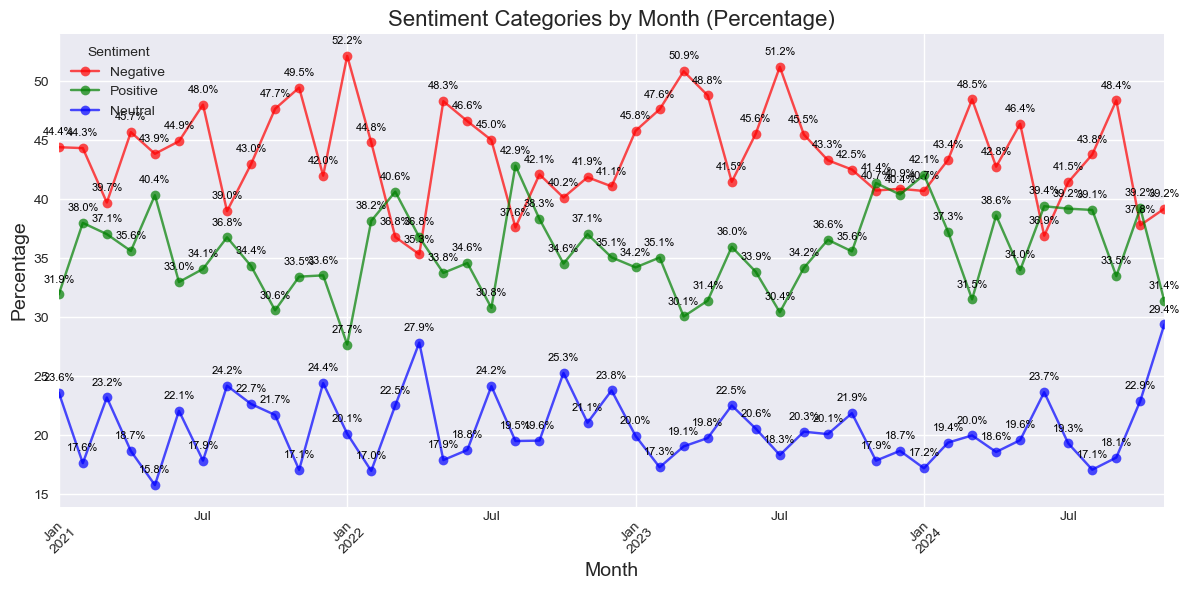

In [16]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth and sentiment category, and get the count of each category
sentiment_by_month = df.groupby(['YearMonth', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (Negative, Positive, Neutral)
sentiment_by_month = sentiment_by_month[['Negative', 'Positive', 'Neutral']]

# Calculate percentages by dividing each value by the sum of the values for the month
sentiment_percentage_by_month = sentiment_by_month.div(sentiment_by_month.sum(axis=1), axis=0) * 100

# Plot sentiment categories by month (Line Graph)
ax = sentiment_percentage_by_month.plot(
    kind='line',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7,
    marker='o'  # Adds a marker for each data point
)

# Add data labels to the line points with percentages
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y):  # Avoid plotting labels for NaN values
            ax.text(x, y + 1, f'{y:.1f}%', color='black', ha='center', fontsize=8)

# Customize the plot
plt.title('Sentiment Categories by Month (Percentage)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/line_sentiment_month_percentage22.png")

# Show the plot
plt.show()
plt.close()

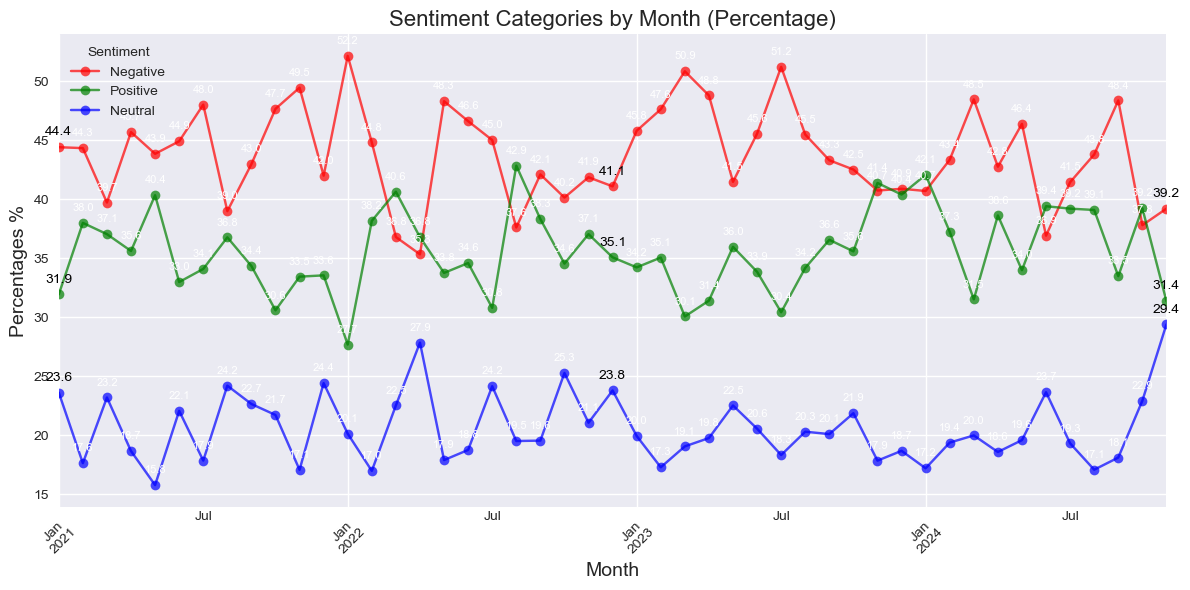

In [17]:
import numpy as np

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth and sentiment category, and get the count of each category
sentiment_by_month = df.groupby(['YearMonth', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (Negative, Positive, Neutral)
sentiment_by_month = sentiment_by_month[['Negative', 'Positive', 'Neutral']]

# Calculate percentages by dividing each value by the sum of the values for the month
sentiment_percentage_by_month = sentiment_by_month.div(sentiment_by_month.sum(axis=1), axis=0) * 100

# Plot sentiment categories by month (Line Graph)
ax = sentiment_percentage_by_month.plot(
    kind='line',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7,
    marker='o'  # Adds a marker for each data point
)

# Add data labels to the line points with percentages
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    for idx, (x, y) in enumerate(zip(x_data, y_data)):
        if not pd.isna(y):  # Avoid labeling NaN values
            # Add labels for the beginning, middle, and end, and skip other points
            if idx == 0 or idx == len(x_data) // 2 or idx == len(x_data) - 1:
                ax.text(x, y + 1, f'{y:.1f}', color='black', ha='center', fontsize=10)
            else:
                ax.text(x, y + 1, f'{y:.1f}', color='white', ha='center', fontsize=8)

# Customize the plot
plt.title('Sentiment Categories by Month (Percentage)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentages %', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/newline_sentiment_month_percentage22.png")

# Show the plot
plt.show()
plt.close()

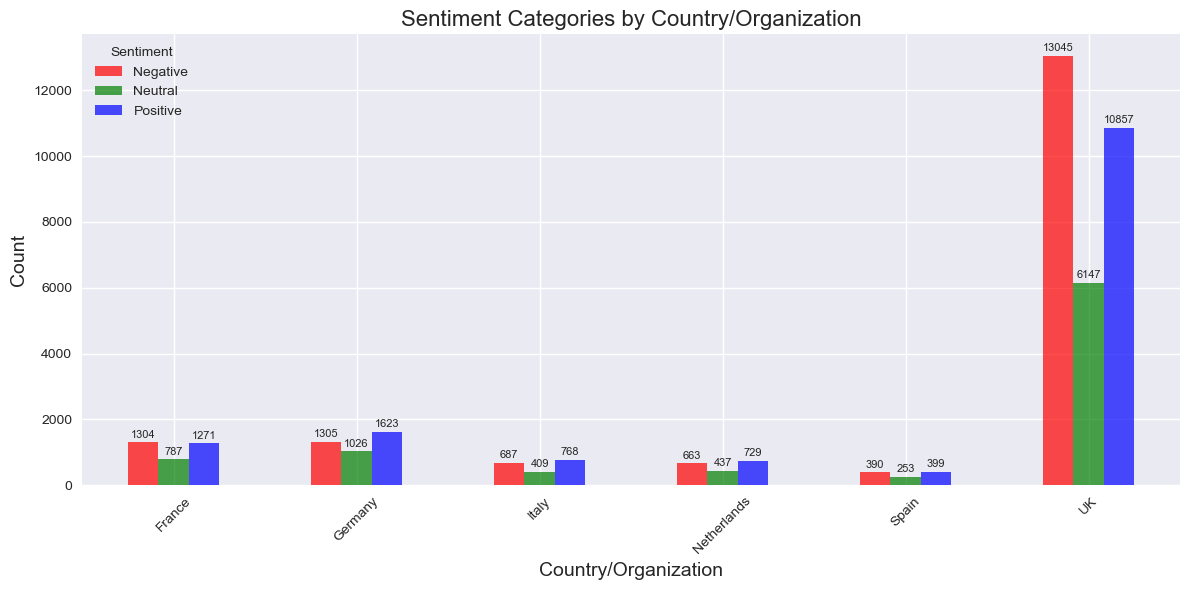

In [18]:
# Filter for the specific countries
selected_countries = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = df[df['Country/Organization'].isin(selected_countries)]

# Group by Country/Organization and count sentiment categories
sentiment_by_country = filtered_df.groupby(['Country/Organization', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder the columns to ensure consistent color mapping (Negative, Positive, Neutral)
sentiment_by_month = sentiment_by_month[['Negative', 'Positive', 'Neutral']]

# Plot sentiment categories by Country/Organization (Grouped Bar Chart)
ax = sentiment_by_country.plot(
    kind='bar',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7
)

# Add data labels to the grouped bar chart
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

# Customize the plot
plt.title('Sentiment Categories by Country/Organization', fontsize=16)
plt.xlabel('Country/Organization', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/sentiment_country22.png")

# Show the plot
plt.show()
plt.close()

/var/folders/p8/733n06nx7bd3_rxwf0gydk_w0000gn/T/ipykernel_1082/2852382451.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


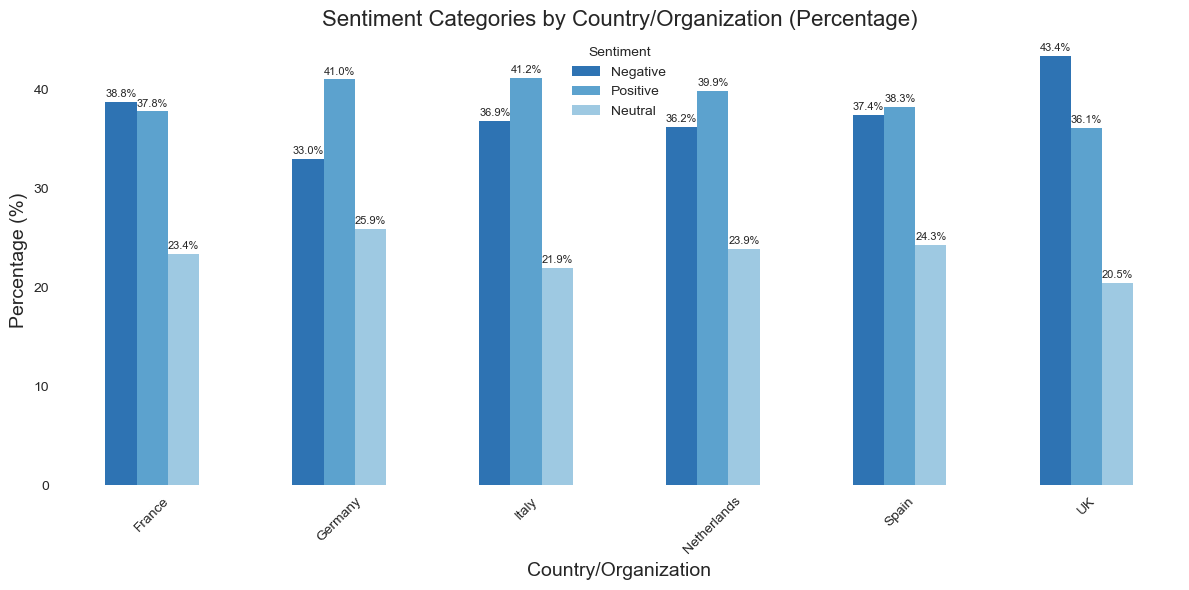

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filter for the specific countries
selected_countries = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = df[df['Country/Organization'].isin(selected_countries)]

# Group by Country/Organization and count sentiment categories
sentiment_by_country = filtered_df.groupby(['Country/Organization', 'sentiment_category']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment category
sentiment_percentage_by_country = sentiment_by_country.div(sentiment_by_country.sum(axis=1), axis=0) * 100

# Reorder the columns to ensure consistent color mapping (Negative, Positive, Neutral)
sentiment_percentage_by_country = sentiment_percentage_by_country[['Negative', 'Positive', 'Neutral']]

# Define shades of blue for the bars
cmap = cm.get_cmap('Blues')
colors = [cmap(0.8), cmap(0.6), cmap(0.4)]  # Three shades of blue

# Plot sentiment categories by Country/Organization (Grouped Bar Chart)
ax = sentiment_percentage_by_country.plot(
    kind='bar',
    figsize=(12, 6),
    color=colors,
    alpha=0.9
)

# Add data labels to the grouped bar chart (percentage values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=2)

# Customize the plot
plt.title('Sentiment Categories by Country/Organization (Percentage)', fontsize=16)
plt.xlabel('Country/Organization', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)

# Remove background grid and spines
ax.set_facecolor('white')
plt.gca().patch.set_alpha(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment_country_percentage22.png")

# Show the plot
plt.show()
plt.close()

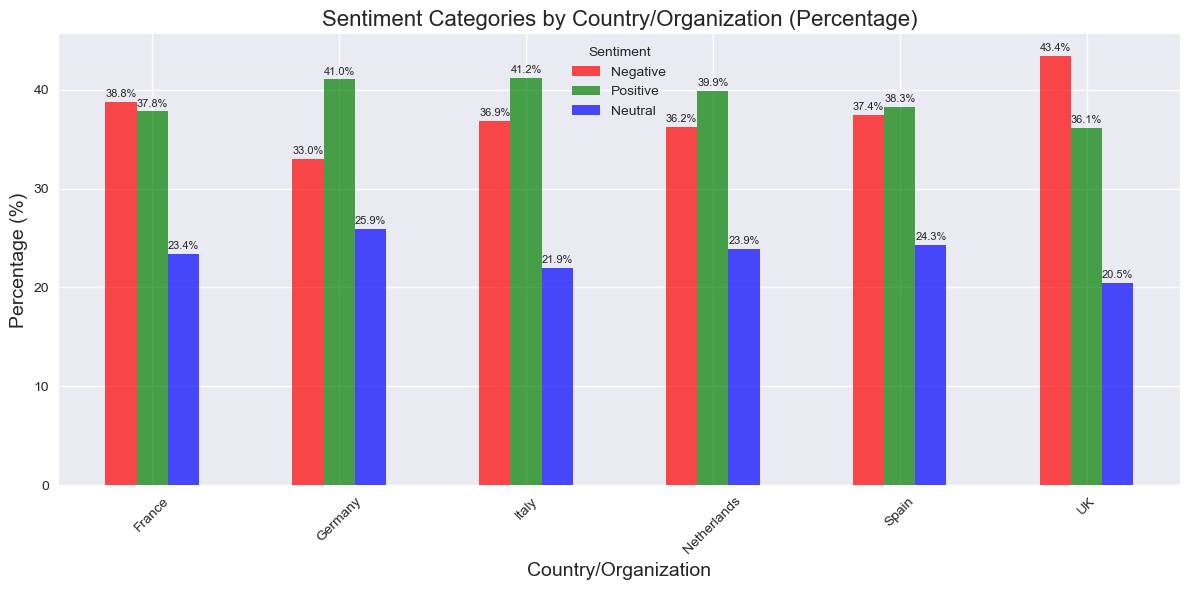

In [21]:
# Filter for the specific countries
selected_countries = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = df[df['Country/Organization'].isin(selected_countries)]

# Group by Country/Organization and count sentiment categories
sentiment_by_country = filtered_df.groupby(['Country/Organization', 'sentiment_category']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment category
sentiment_percentage_by_country = sentiment_by_country.div(sentiment_by_country.sum(axis=1), axis=0) * 100

# Reorder the columns to ensure consistent color mapping (Negative, Positive, Neutral)
sentiment_percentage_by_country = sentiment_percentage_by_country[['Negative', 'Positive', 'Neutral']]

# Plot sentiment categories by Country/Organization (Grouped Bar Chart)
ax = sentiment_percentage_by_country.plot(
    kind='bar',
    figsize=(12, 6),
    color=['red', 'green', 'blue'],
    alpha=0.7
)

# Add data labels to the grouped bar chart (percentage values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=2)

# Customize the plot
plt.title('Sentiment Categories by Country/Organization (Percentage)', fontsize=16)
plt.xlabel('Country/Organization', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the plot before showing
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/sentiment/sentiment_country_percentage22.png")

# Show the plot
plt.show()
plt.close()

In [22]:
df.head()

,Date,Headline,Source,Country/Organization,Extracted_Content,compound_score,positive_score,negative_score,neutral_score,sentiment_category,Year,YearMonth
0,2024-06-07,www.bbc.com,BBC,UK,The UK government wants to send some asylum se...,0.0772,0.091,0.000,0.909,Positive,2024,2024-06
1,2024-06-07,www.bbc.com,BBC,UK,The International Organization for Migration e...,-0.5574,0.000,0.310,0.690,Negative,2024,2024-06
2,2024-06-07,www.bbc.com,BBC,UK,"On 6 June, around 80 migrants, including at le...",0.0258,0.193,0.186,0.621,Neutral,2024,2024-06
3,2024-06-07,www.bbc.com,BBC,UK,"However, numbers rose again throughout the 201...",0.0772,0.178,0.000,0.822,Positive,2024,2024-06
4,2024-06-07,www.bbc.com,BBC,UK,Where do UK asylum seekers come from?,0.0000,0.000,0.000,1.000,Neutral,2024,2024-06


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


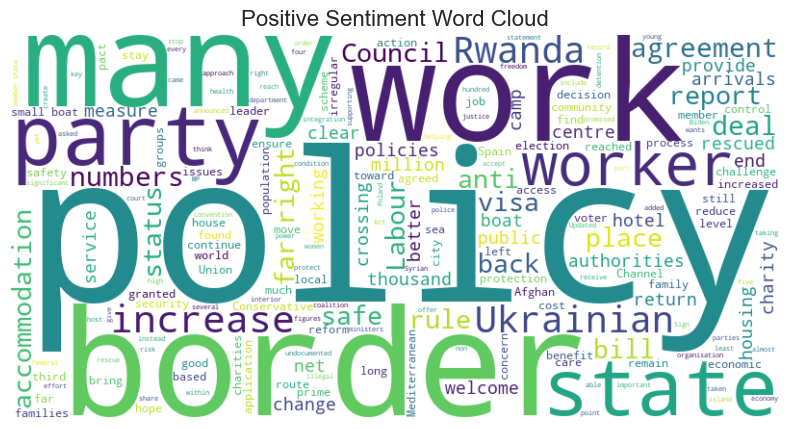

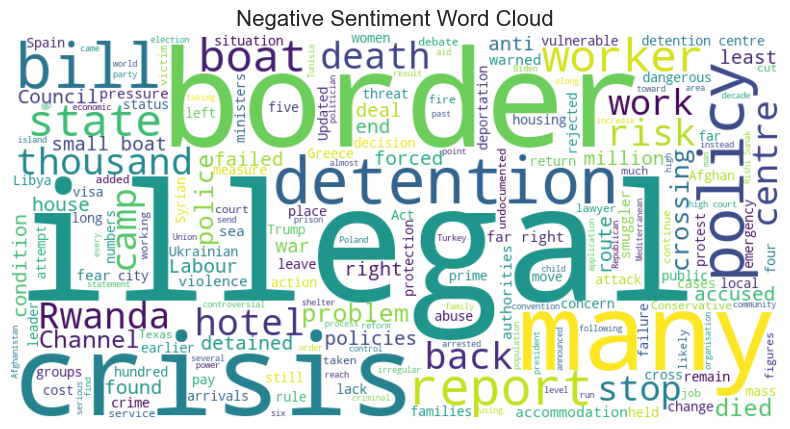

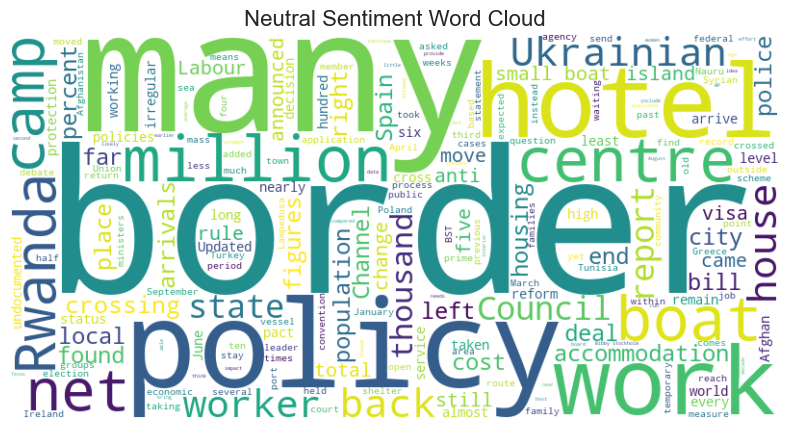

In [23]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# Example dataframe
#data = df

# Stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = set([
    "refugee", "refugees", "migrant", "migrants", "immigrant", "immigrants",
    "like", "say", "told", "make", "would", "want", "take", "must", "well",
    "could", "even", "since", "also", "-", "know", "immigration", "migration",
    "asylum seeker", "asylum seekers", "said", "asylum", "seeker"])
all_stop_words = stop_words.union(custom_stop_words)

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        stopwords=all_stop_words, 
        background_color="white"
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# # Categorize sentiments into Positive, Negative, and Neutral
# def categorize_sentiment(score):
#     if score > 0:
#         return "Positive"
#     elif score < 0:
#         return "Negative"
#     else:
#         return "Neutral"

# df['sentiment_name'] = df['sentiment_value'].apply(categorize_sentiment)

# Generate word clouds for each sentiment category
for sentiment in ["Positive", "Negative", "Neutral"]:
    sentiment_df = df[df['sentiment_category'] == sentiment]
    
    # Combine all Extracted_Content for the given sentiment into a single string
    text = " ".join(sentiment_df['Extracted_Content'].dropna())
    
    # Generate word cloud
    generate_wordcloud(text, f"{sentiment} Sentiment Word Cloud")

In [24]:
df.shape

(42780, 12)